In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rm1000/brain-tumor-mri-scans")

print("Path to dataset files:", path)

100%|██████████| 236M/236M [00:06<00:00, 36.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
sns.set()

In [7]:
os.listdir('/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1')

['meningioma', 'healthy', 'pituitary', 'glioma']

In [11]:
image = cv2.imread('/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1/meningioma/0714.jpg')

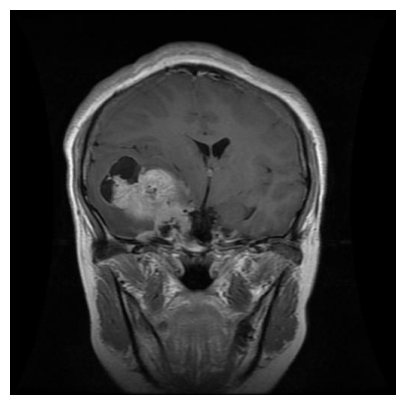

In [12]:
plt.figure(figsize = (7, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
image.shape

(512, 512, 3)

In [14]:
img = image.reshape((-1, 3))

In [15]:
img = np.float32(img)

In [16]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

In [39]:
retval, labels, centers = cv2.kmeans(img, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [40]:
centers = np.uint8(centers)

In [41]:
segmented_data = centers[labels.flatten()]

In [42]:
segmented_data = segmented_data.reshape(512, 512, 3)

In [43]:
segmented_data.shape

(512, 512, 3)

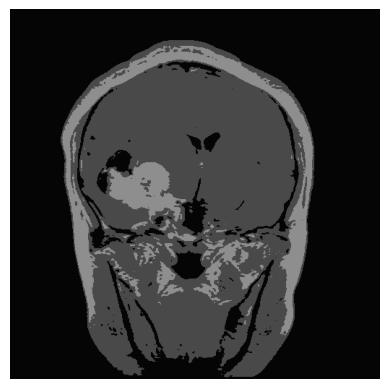

In [44]:
plt.imshow(segmented_data)
plt.axis('off')
plt.show()

In [55]:
image2 = cv2.imread('/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1/healthy/0850.jpg')

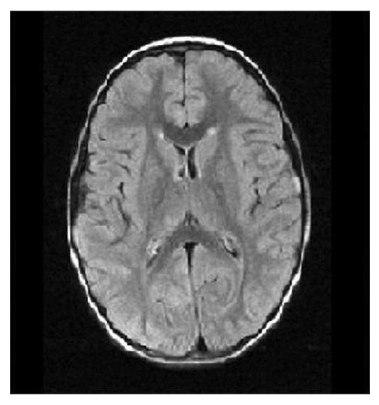

In [56]:
plt.figure(figsize = (7, 5))
plt.imshow(image2)
plt.axis('off')
plt.show()

In [57]:
img2 = image2.reshape((-1, 3))

In [58]:
img2 = np.float32(img2)

In [59]:
retval, labels, centers = cv2.kmeans(img2, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [62]:
centers = np.uint8(centers)

In [63]:
segmented_data2 = centers[labels.flatten()]

In [64]:
image2.shape

(540, 504, 3)

In [65]:
segmented_data2 = segmented_data2.reshape((540, 504, 3))

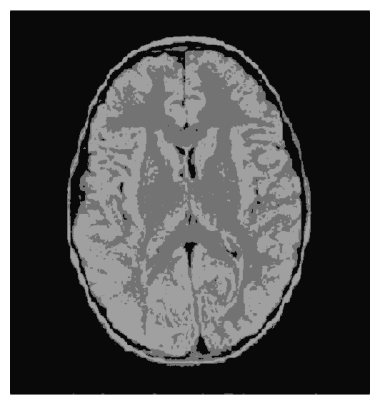

In [66]:
plt.figure(figsize = (7, 5))
plt.imshow(segmented_data2)
plt.axis('off')
plt.show()

In [97]:
len(images)

7023

In [67]:
images, labels = [], []
for i in os.listdir('/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1'):
  for j in os.listdir(os.path.join('/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1', i)):
    path = os.path.join('/root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1', i, j)
    img = cv2.imread(path)
    if img is not None:
      images.append(img)
      labels.append(i)

In [103]:
def image_segmentation(im):
  im_shape = im.shape
  im = im.reshape((-1, 3))
  im = np.float32(im)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  retval, labels, centers = cv2.kmeans(im, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_data = segmented_data.reshape((im_shape))
  return segmented_data

array([[[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       ...,

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]]], dtype=uint8)
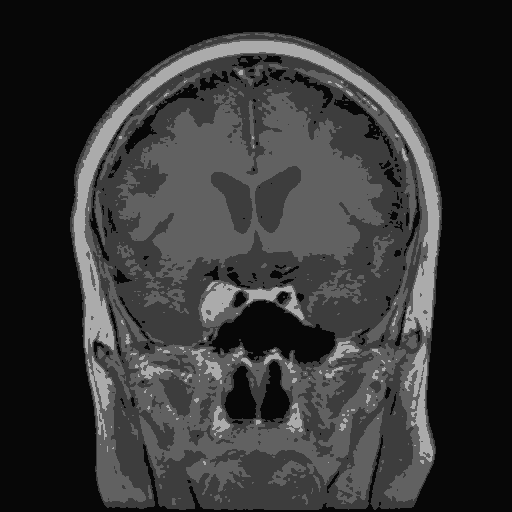

In [107]:
image_segmentation(images[3])

In [98]:
b = images[:10]

In [99]:
segmented_images = []
for i in b:
  segmented_images.append(image_segmentation(i))

array([[[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       ...,

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]]], dtype=uint8)
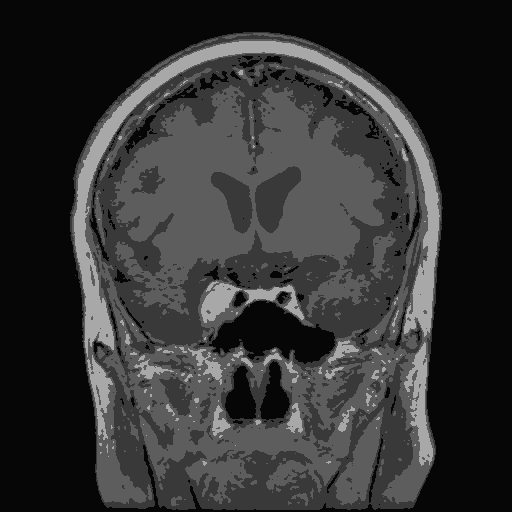

In [116]:
segmented_images[3]